In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('SJ001_merge_1day_full.csv')
data = df.iloc[:, 1:].values
for i in range(len(data)):
    if data[i, 2] > 500:
        data[i, 2] = (data[i-1, 2] + data[i+1, 2])/2 

# data = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))

In [3]:
df.head()

,SITE_NO,DATE,TIME,GEN_ENERGY,TEMPERATURE,SOLAR_IRRADIANCE,WIND_SPEED,MODULE_TEMPERATURE,POP,REH,SKY,T3H,WSD
0,SJ001,245,5.000000,0.0,0.00,0.0,0.0,0.0000,10.0,50.0,2.0,25.0,1.4
1,SJ001,245,5.166667,0.0,0.00,0.0,0.0,0.0000,10.0,50.0,2.0,25.0,1.4
2,SJ001,245,5.333333,0.0,0.00,0.0,0.0,0.0000,10.0,50.0,2.0,25.0,1.4
3,SJ001,245,5.500000,0.0,0.00,0.0,0.0,0.0000,10.0,50.0,2.0,25.0,1.4
4,SJ001,245,5.666667,0.0,14.82,0.0,0.0,13.3729,10.0,50.0,2.0,25.0,1.4


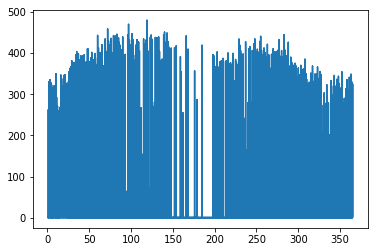

In [4]:
plt.plot(data[:,0], data[:,2])
plt.show()

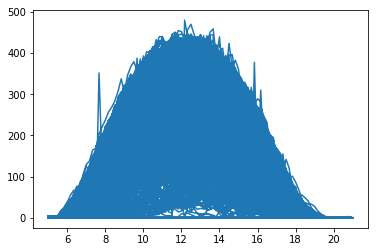

In [5]:
plt.plot(data[:,1], data[:,2])
plt.show()

In [4]:
g_avg = np.zeros((12, 97))

for i in range(12):
    group = df[(df.DATE >= 0+30*i) & (df.DATE <= 30+30*i)].groupby('DATE')
    group = group.filter(lambda x: x['GEN_ENERGY'].mean() >= 100)
    g_avg[i,:] = group.groupby('TIME').mean()['GEN_ENERGY'].values

In [5]:
t = df['TIME'][:20].values
(t-5)*6

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19.])

In [6]:
def date_to_avg(date, time):
    return g_avg[int(date/30), int((time-5)*6)]

In [7]:
date = data[:,0]
time = data[:,1]

d=(date/31).astype('int')
t = ((time-5)*6.01).astype('int')

g_avg[d,t]

array([0.06818182, 0.04545455, 0.05681818, ..., 0.73333333, 0.81111111,
       0.        ])

0


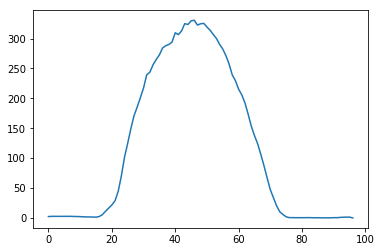

1


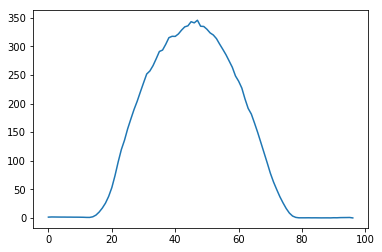

2


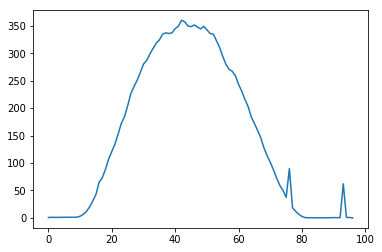

3


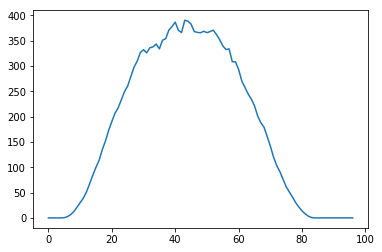

4


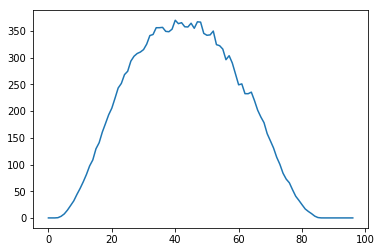

5


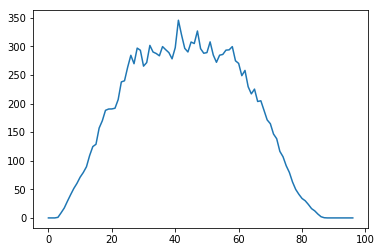

6


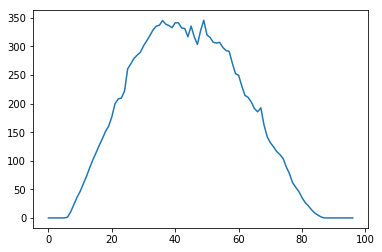

7


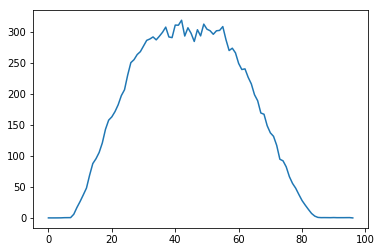

8


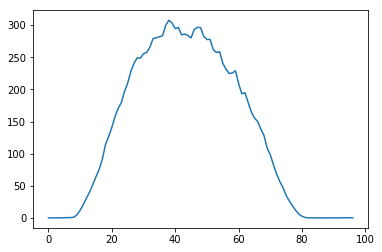

9


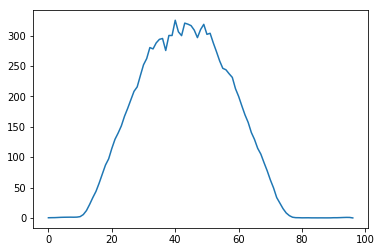

10


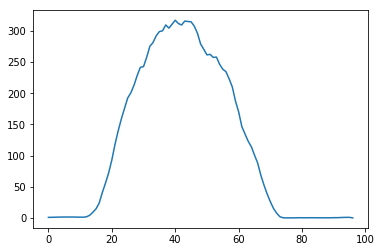

11


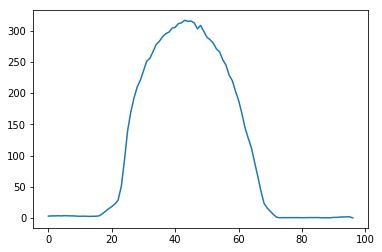

In [8]:
for i in range(12):
    print(i)
    plt.plot(g_avg[i,:])
    plt.show()

In [59]:
a = df[(df.DATE >= 0+30*5) & (df.DATE <= 30+30*5)].groupby('TIME').mean()['GEN_ENERGY'].values

In [ ]:
group = df[(df.DATE >= 0+30*5) & (df.DATE <= 30+30*5)].groupby('DATE')
group = group.filter(lambda x: x['GEN_ENERGY'].mean() >= 100)
b = group.groupby('TIME').mean()['GEN_ENERGY'].values

In [ ]:
plt.plot(a)
plt.plot(b)
plt.show()

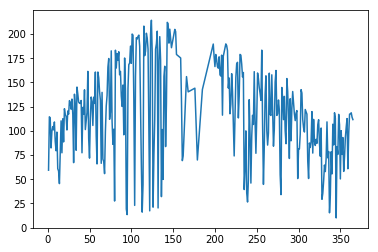

In [67]:
plt.plot(df.groupby('DATE').mean()['GEN_ENERGY'])

In [68]:
df.groupby('DATE').mean()

,TIME,GEN_ENERGY,TEMPERATURE,SOLAR_IRRADIANCE,WIND_SPEED,MODULE_TEMPERATURE,POP,REH,SKY,T3H,WSD
DATE,,,,,,,,,,,
1,13.0,59.371134,-7.837423,107.560053,0.000000,-5.703015,3.092784,35.979381,1.309278,-1.092784,4.925773
2,13.0,114.474227,-7.525902,216.488980,0.000000,-3.183969,0.000000,26.597938,1.000000,-1.381443,3.454639
3,13.0,113.345361,-6.585052,219.909600,0.000000,-0.545979,0.000000,20.000000,1.000000,-0.381443,2.702062
4,13.0,82.340206,-7.077088,160.863336,0.000000,-2.741495,11.340206,44.175258,2.134021,0.319588,2.330928
5,13.0,99.298969,-5.659562,186.961789,0.000000,-1.715052,10.000000,29.020619,2.000000,0.659794,3.700000
6,13.0,104.355670,-6.989227,192.928928,0.000000,-1.304201,10.515464,25.360825,2.051546,-0.505155,2.296907
7,13.0,101.015464,-6.370000,189.511921,0.000000,-2.553814,5.773196,32.886598,1.577320,0.865979,3.261856
8,13.0,109.170103,-6.422113,208.322612,0.000000,-2.273969,10.721649,26.030928,2.072165,0.360825,4.922680
9,13.0,89.134021,-8.417036,172.921645,0.000000,-2.931753,7.628866,28.917526,1.762887,-2.608247,1.613402
